# Set up connection to Data Base

## (1) Enter user name and password to connect to data base

In [1]:
import sys

sys.path.append("../")
from data_base.db_setup import *

Please enter DataJoint username:  tamara
Please enter DataJoint password:  ·········


Connecting tamara@localhost:3306


## (2) Looking at individual tables

Get table 'patients':

In [2]:
Patient()

patient_id patient ID,age age of patient,gender gender of patient,year year of surgery,removed_tissue information about removed tissue,epilepsy_type information about epilepsy type,additional_information space for additional information
46,1,f,2015,unknown,unknown,
50,1,x,2016,unknown,unknown,
52,1,x,2016,unknown,unknown,
53,1,x,2016,unknown,unknown,
60,1,x,2017,unknown,unknown,


Get table 'movie_sessions':

In [3]:
SpikeTimesDuringMovie()

patient_id patient ID,unit_id unique ID for unit (for respective patient),session_nr session ID,spike_times in case bin_size is not 0: number of spikes; otherwise: times of spikes (original data)
46,0,1,=BLOB=
46,1,1,=BLOB=
46,2,1,=BLOB=
46,3,1,=BLOB=
46,4,1,=BLOB=
46,5,1,=BLOB=
46,6,1,=BLOB=
46,7,1,=BLOB=
46,8,1,=BLOB=
46,9,1,=BLOB=


In [4]:
PatientAlignedLabel().fetch("label_in_patient_time")[0]

array([0, 0, 0, ..., 0, 0, 0])

## (3) Write queries using DataJoint to extract specific data from the data base

If you want to get the firing rates of patient 46, binned in seconds but only of the brain region 'LA', you can get it with the following query:

In [5]:
list_of_spikes_LA_46 = ((ElectrodeUnit & "brain_region = 'LA'" & "patient_id= '46'") * (BinnedSpikesDuringMovie & "bin_size='1000'")).fetch('spike_vector')[0]

In [6]:
list_of_spikes_LA_46 = np.load(list_of_spikes_LA_46)

In [7]:
list_of_spikes_LA_46

array([0, 0, 0, ..., 0, 0, 0])

Getting a label from the data base:

In [8]:
label_tom = (VideoAnnotation & "label_name='tom'").fetch("movie_label")[0]

In [9]:
label_tom = np.load(label_tom)

In [10]:
label_tom

array([0, 0, 0, ..., 0, 0, 0])

Some commonly used queries are implemented as python functions in 'db_setup.py'

In [11]:
get_unit_id(csc_nr = 10, unit_type='M', unit_nr=1, patient_id=46)

9

## (4) Visualising data base structure

green rectangles: manual tables
    
    
blue ellipses: imported tables
    

/home/tamara/anaconda3/envs/dhv/lib/python3.7/site-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


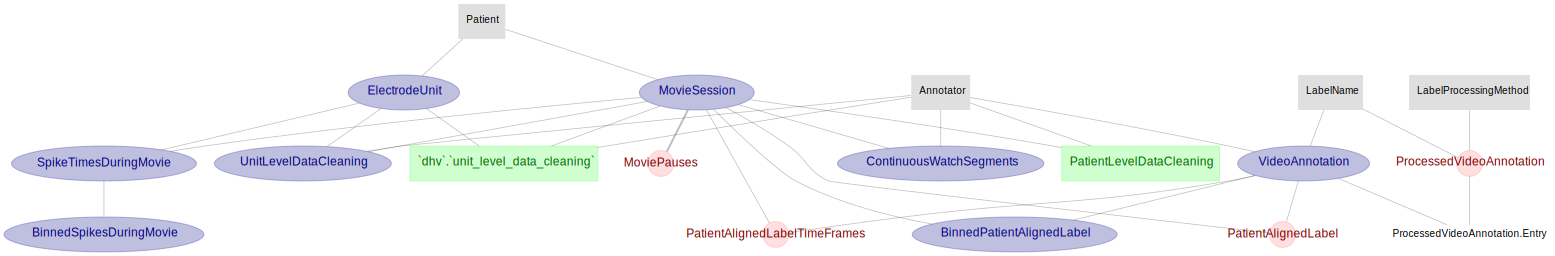

In [8]:
erd = dj.ERD(dhv_schema)
#erd.save("/home/tamara/Desktop/erd_20200415.png")
erd

In [9]:
values, starts, stops = (MovieAnnotation() & "label_name='rachel'").fetch('values', 'start_times', 'stop_times')

In [10]:
values = values[0]
starts = starts[0]
stops=stops[0]

In [11]:
values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])